In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv', parse_dates=['Order Date'])

# Set the 'Order Date' column as the index
df.set_index('Order Date', inplace=True)

# Display the first few rows of the dataset
df.head()


,Row ID,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,,
08/11/2017,1,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
08/11/2017,2,CA-2017-152156,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
12/06/2017,3,CA-2017-138688,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
11/10/2016,4,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
11/10/2016,5,US-2016-108966,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [2]:
df = df.dropna(subset=['Sales'])
# ya
df['Sales'] = df['Sales'].fillna(df['Sales'].mean())  # Fill missing with mean


In [3]:
df = df[df['Sales'] <= 10000]  # Remove sales greater than 10000


Make the Data Stationary

<Axes: title={'center': 'Differenced Sales Data'}, xlabel='Order Date'>

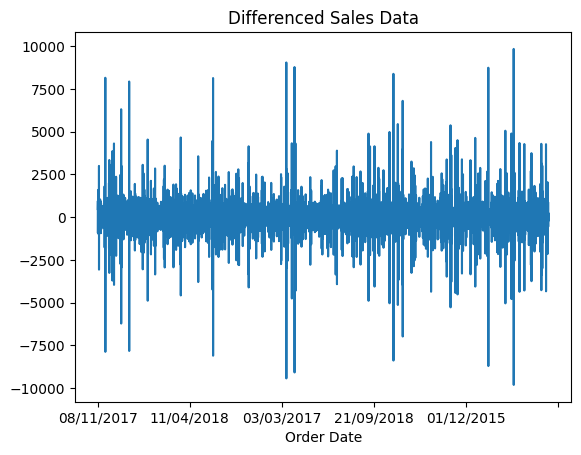

In [7]:
# Differencing to make the data stationary
df['Sales_diff'] = df['Sales'] - df['Sales'].shift(1)
df['Sales_diff2'] = df['Sales_diff'] - df['Sales_diff'].shift(1)

# Plot the differenced data
df['Sales_diff'].plot(title="Differenced Sales Data")


In [10]:
pip install statsmodels


Defaulting to user installation because normal site-packages is not writeable
  Using cached statsmodels-0.14.5-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.5-cp313-cp313-win_amd64.whl (9.6 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodel


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train the SARIMA model
sarima_model = SARIMAX(df['Sales'],
                       order=(1, 1, 1),  # p, d, q (AR, I, MA)
                       seasonal_order=(1, 1, 1, 12),  # P, D, Q, s (seasonal AR, I, MA, period)
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Fit the model
sarima_result = sarima_model.fit()

# Summary of the model
sarima_result.summary()


C:\Users\hamaa\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\hamaa\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\hamaa\AppData\Roaming\Python\Python313\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                 9795
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -75009.244
Date:                            Sat, 27 Sep 2025   AIC                         150028.488
Time:                                    16:29:38   BIC                         150064.423
Sample:                                         0   HQIC                        150040.666
                                           - 9795                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0030      0.013     -0.232      0.817      -0.028       0.022
ma.L1         -0.9990      0.001  -1099.718      0.000      -1.001      -0.997
ar.S.L12      -0.0952      0.010     -9.251      0.000      -0.115      -0.075
ma.S.L12      -1.0161      0.003   -326.711      0.000      -1.022      -1.010
sigma2      2.559e+05   1506.000    169.944      0.000    2.53e+05    2.59e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):           2741369.04
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                             7.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        83.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\hamaa\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\hamaa\AppData\Roaming\Python\Python313\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


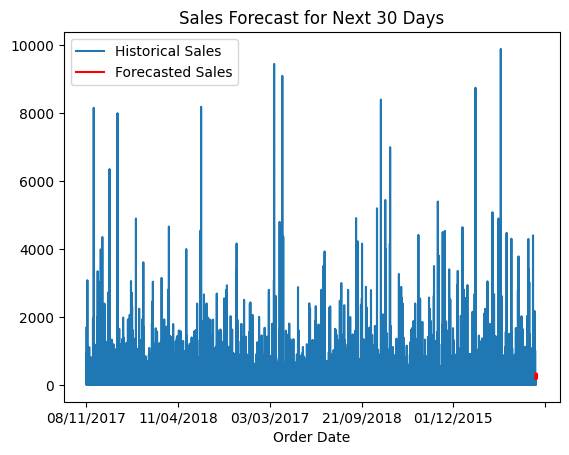

In [14]:
import matplotlib.pyplot as plt  

# Forecast the next 30 days
forecast = sarima_result.get_forecast(steps=30)

# Get the predicted mean
forecast_mean = forecast.predicted_mean

# Plot the forecast
df['Sales'].plot(label='Historical Sales')
forecast_mean.plot(label='Forecasted Sales', color='red')
plt.legend()
plt.title("Sales Forecast for Next 30 Days")
plt.show()


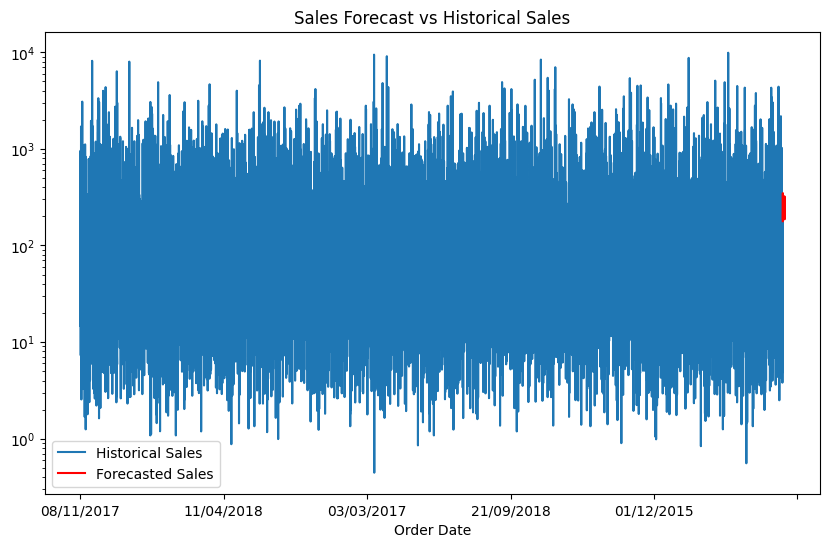

In [17]:
import matplotlib.pyplot as plt

# Plotting the historical data and forecast
plt.figure(figsize=(10,6))

# Plot historical sales
df['Sales'].plot(label='Historical Sales')

# Plot forecasted sales
forecast_mean.plot(label='Forecasted Sales', color='red')

# Adding log scale for y-axis (if necessary)
plt.yscale('log')

# Adding title and legend
plt.legend()
plt.title("Sales Forecast vs Historical Sales")

# Show the plot
plt.show()
